In [1]:
import numpy as np
import ggseg
import pickle

from matplotlib import pyplot as plt 
import pandas as pd 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
import plotly.offline as pyo

In [3]:
# Import Pikle File
read_input_file = open('data/ADC_FTLD_subtypes_agecorrected_zscore_final.pickle','rb')
load_inputs = pickle.load(read_input_file)
read_input_file.close()

T, S, X = load_inputs

## Region Mapping

- cortical --> taken separately
- hemisphere regions --> combined

In [4]:
def mapping_dk(T):

    """
    Creates a dictionary of dk-atlas labels grouped into larger regions corresponding to T.biomarker_labels
    :param T: Timeline object
    :return: dictionary, key:value => T.biomarker_labels: [dk labels]
    """
    
    org_cortical_mapping_left = [['lh_bankssts_volume','lh_transversetemporal_volume',
                                  'lh_superiortemporal_volume','lh_temporalpole_volume','lh_entorhinal_volume',
                                  'lh_middletemporal_volume','lh_inferiortemporal_volume','lh_fusiform_volume'], 
                                 ['lh_superiorfrontal_volume','lh_frontalpole_volume'], 
                                 ['lh_caudalmiddlefrontal_volume','lh_rostralmiddlefrontal_volume'], 
                                 ['lh_parsopercularis_volume','lh_parsorbitalis_volume','lh_parstriangularis_volume'], 
                                 ['lh_medialorbitofrontal_volume'], ['lh_lateralorbitofrontal_volume'], 
                                 ['lh_precentral_volume','lh_paracentral_volume'], ['lh_postcentral_volume'], 
                                 ['lh_superiorparietal_volume','lh_precuneus_volume'], ['lh_inferiorparietal_volume','lh_supramarginal_volume'], 
                                 ['lh_lateraloccipital_volume'], ['lh_cuneus_volume','lh_pericalcarine_volume'], 
                                 ['lh_lingual_volume'], ['lh_insula_volume'], ['lh_caudalanteriorcingulate_volume','lh_rostralanteriorcingulate_volume'], 
                                 ['lh_posteriorcingulate_volume','lh_isthmuscingulate_volume'], 
                                 ['lh_parahippocampal_volume']]

    list_imaging_cortical_left = ['Temporal_lobe_left','Superior_frontal_gyrus_left',
                                  'Middle_frontal_gyrus_left','Inferior_frontal_gyrus_left', 
                                  'Gyrus_rectus_left','Orbitofrontal_gyri_left','Precentral_gyrus_left',
                                  'Postcentral_gyrus_left','Superior_parietal_gyrus_left', 
                                  'Inferolateral_remainder_of_parietal_lobe_left',
                                  'Lateral_remainder_of_occipital_lobe_left','Cuneus_left','Lingual_gyrus_left', 
                                  'Insula_left','Gyrus_cinguli_anterior_part_left','Gyrus_cinguli_posterior_part_left',
                                  'Parahippocampal_and_ambient_gyri_left']

    org_cortical_mapping_right = [['rh_bankssts_volume','rh_transversetemporal_volume',
                                  'rh_superiortemporal_volume','rh_temporalpole_volume','rh_entorhinal_volume',
                                  'rh_middletemporal_volume','rh_inferiortemporal_volume','rh_fusiform_volume'], 
                                 ['rh_superiorfrontal_volume','rh_frontalpole_volume'], 
                                 ['rh_caudalmiddlefrontal_volume','rh_rostralmiddlefrontal_volume'], 
                                 ['rh_parsopercularis_volume','rh_parsorbitalis_volume','rh_parstriangularis_volume'], 
                                 ['rh_medialorbitofrontal_volume'], ['rh_lateralorbitofrontal_volume'], 
                                 ['rh_precentral_volume','rh_paracentral_volume'], ['rh_postcentral_volume'], 
                                 ['rh_superiorparietal_volume','rh_precuneus_volume'], ['rh_inferiorparietal_volume','rh_supramarginal_volume'], 
                                 ['rh_lateraloccipital_volume'], ['rh_cuneus_volume','rh_pericalcarine_volume'], 
                                 ['rh_lingual_volume'], ['rh_insula_volume'], ['rh_caudalanteriorcingulate_volume','rh_rostralanteriorcingulate_volume'], 
                                 ['rh_posteriorcingulate_volume','rh_isthmuscingulate_volume'], 
                                 ['rh_parahippocampal_volume']]

    list_imaging_cortical_right = ['Temporal_lobe_right',
                                   'Superior_frontal_gyrus_right',
                                  'Middle_frontal_gyrus_right',
                                   'Inferior_frontal_gyrus_right', 
                                  'Gyrus_rectus_right',
                                   'Orbitofrontal_gyri_right',
                                   'Precentral_gyrus_right',
                                  'Postcentral_gyrus_right',
                                   'Superior_parietal_gyrus_right', 
                                  'Inferolateral_remainder_of_parietal_lobe_right',
                                  'Lateral_remainder_of_occipital_lobe_right',
                                   'Cuneus_right',
                                   'Lingual_gyrus_right', 
                                  'Insula_right',
                                   'Gyrus_cinguli_anterior_part_right',
                                   'Gyrus_cinguli_posterior_part_right',
                                  'Parahippocampal_and_ambient_gyri_right']
    
    # DK-labels in left hemisphere grouped into cortical regions corresponding to T.biomarker_labels
    dk_left = [org_cortical_mapping_left[0] + org_cortical_mapping_left[16],
         org_cortical_mapping_left[1] + org_cortical_mapping_left[2]+org_cortical_mapping_left[3]+
         org_cortical_mapping_left[4]+org_cortical_mapping_left[5]+org_cortical_mapping_left[6],
         org_cortical_mapping_left[7]+org_cortical_mapping_left[8]+org_cortical_mapping_left[9],
         org_cortical_mapping_left[10]+org_cortical_mapping_left[11]+org_cortical_mapping_left[12],
         org_cortical_mapping_left[14]+org_cortical_mapping_left[15],
         org_cortical_mapping_left[13]]
    
    # DK-labels in right hemisphere grouped into cortical regions corresponding to T.biomarker_labels
    dk_right = [org_cortical_mapping_right[0] + org_cortical_mapping_right[16],
         org_cortical_mapping_right[1] + org_cortical_mapping_right[2]+org_cortical_mapping_right[3]+
         org_cortical_mapping_right[4]+org_cortical_mapping_right[5]+org_cortical_mapping_right[6],
         org_cortical_mapping_right[7]+org_cortical_mapping_right[8]+org_cortical_mapping_right[9],
         org_cortical_mapping_right[10]+org_cortical_mapping_right[11]+org_cortical_mapping_right[12],
         org_cortical_mapping_right[14]+org_cortical_mapping_right[15],
         org_cortical_mapping_right[13]]
    
    # clean region names
    for l in range(len(dk_left)):
        for i in range(len(dk_left[l])):
            dk_left[l][i]=dk_left[l][i].replace('_volume','_left')
            dk_left[l][i]=dk_left[l][i].replace('lh_','')
    
    for l in range(len(dk_right)):
        for i in range(len(dk_right[l])):
            dk_right[l][i]=dk_right[l][i].replace('_volume','_right')
            dk_right[l][i]=dk_right[l][i].replace('rh_','')
    
    dk = dk_left + dk_right

    
    regions = list(map(lambda x: x.lower(), T.biomarker_labels[12:]))
    
    # final dictionary of key: value pairs corresponding to T.biomarker_label: list(DK-labels)
    dic = dict(zip(regions, dk))
    
    return dic

In [5]:
dic_dk = mapping_dk(T)

In [6]:
def dk_dict(T,S, mapped_dict, subtype_labels = None, subtype = None):
    
    """
    Creates a dictionary, which can be used as input to ggseg.plot_dk() function
    :param T: dataframe from dk_dataframe() function
    :param S: chosen subtype
    :param mapped_dict: a dictionary with key: values --> T.biomarker_labels: list(DK-labels)
    :param subtype: name or index of the subtype from subtype_lables (optional, choses first available subtype as default)  
    :param subtype_labels: a list with names of the subtypes (optional)
    :return: dictionary with scores for each DK region for chosen subtype
    """
    
    unique_subtypes = np.unique(S['subtypes'][~np.isnan(S['subtypes'])])
    if subtype_labels is None:
        subtype_labels = {f'Subtype {i}': i for i in range(len(unique_subtypes))}
        if subtype is None:
            subtype = next(iter(subtype_labels))
    elif subtype is None:
        subtype = subtype_labels[0]  
        
    # clean names from capital letters
    labels = list(map(lambda x: x.lower(), T.biomarker_labels))
       
    dic = dict(zip(labels, T.sequence_model['ordering'][subtype_labels[subtype]]))
                
    # flat lost of dict values (single list of DK-labels)
    dk_flat = [x for v in mapped_dict.values() for x in v]
        
    #Match T.biomarker_labels to DK labels
    list_plot = list()
    for key in mapped_dict.keys():
        for item in mapped_dict[key]:
            list_plot.append(dic[key])
    
    # Dict for dk-label: T.label value
    dic_dk = dict(zip(dk_flat, list_plot))
    
    return dic_dk

In [7]:
dk_0 = dk_dict(T, S, mapped_dict = dic_dk)
# dk_0

In [8]:
def aseg_dict(T, S, subtype_labels = None, subtype = None):
    
    """
    Creates a dictionary, which can be used as input to ggseg.plot_dk() function
    :param T: dataframe from dk_dataframe() function
    :param S: chosen subtype
    :param subtype_labels: a list with names of the subtypes (optional)
    :param subtype: name or index of the subtype from subtype_lables (optional, choses first available subtype as default)  
    :return: dictionary with scores for each DK region for chosen subtype
    """

    unique_subtypes = np.unique(S['subtypes'][~np.isnan(S['subtypes'])])
    if subtype_labels is None:
        subtype_labels = {f'Subtype {i}': i for i in range(len(unique_subtypes))}
        if subtype is None:
            subtype = next(iter(subtype_labels))
    elif subtype is None:
        subtype = subtype_labels[0]
    
    dic_aseg = dict(zip(T.biomarker_labels, T.sequence_model['ordering'][subtype_labels[subtype]]))
        
    return dic_aseg

In [9]:
aseg_0 = aseg_dict(T,S)
# aseg_0

In [10]:
def plot_ggseg(T,S, mapped_dict, subtype_labels = None, subtype = None): 
    
    import ggseg
    """
    Creates a dictionary, which can be used as input to ggseg.plot_dk() function
    :param T: dataframe from dk_dataframe() function
    :param S: chosen subtype
    :param mapped_dict: a dictionary with key: values --> T.biomarker_labels: list(DK-labels)
    :param subtype_labels: a list with names of the subtypes (optional)
    :param subtype: name or index of the subtype from subtype_lables (optional, choses first available subtype as default)  
    :return: two plots -> ggseg.plot_dk() and ggseg.plot_aseg()
    """
    
    dk = dk_dict(T, S, mapped_dict = mapped_dict, subtype = subtype)
    
    aseg = aseg_dict(T,S, subtype = subtype)
    
    if subtype is None:
        subtype = 'default = 0'

    
    dk_plot = ggseg.plot_dk(dk, cmap='Reds_r', figsize=(10,10),
              vminmax = [0,25],
              background='k', edgecolor='w', bordercolor='gray', title=f'Subtype: {subtype}',
                fontsize = 24)

    ggseg.plot_aseg(aseg, cmap='Reds_r', figsize=(10,10),
                vminmax = [0,25],
                background='k', edgecolor='w', bordercolor='gray', title=f'Subcortical regions for Subtype: {subtype}',
                fontsize = 24)

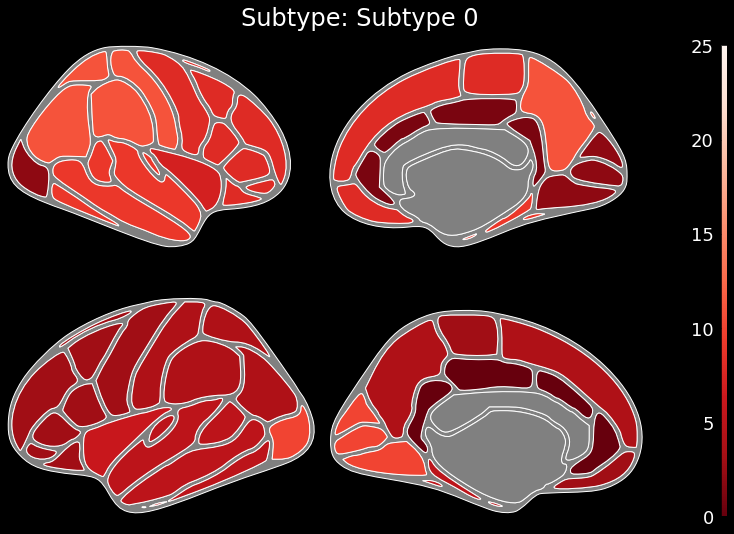

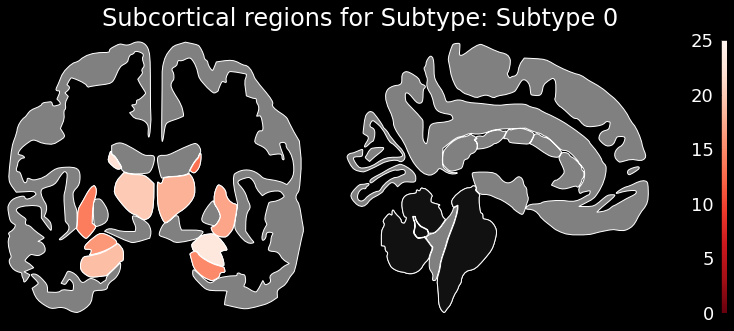

In [11]:
p = plot_ggseg(T, S, dic_dk, subtype_labels = None, subtype = 'Subtype 0')

## Separate plots - for Streamlit App, with Slider

In [14]:
def plot_dk_atlas(T,S, subtype_labels = None, subtype = None, slider = None):     

    """
    Creates a dictionary, which can be used as input to ggseg.plot_dk() function
    :param T: timeline object from snowphlake
    :param S: dictionary from snowphlake
    :param subtype_labels: a list with names of the subtypes (optional)
    :param subtype: name or index of the subtype to visualise (optional)  
    :param slider: int
    :returns a figures by plt.show() -> ggseg.plot_dk() 
    """
    mapped_dict = mapping_dk(T)    
    
    if slider is None:
        dk = dk_dict(T, S, mapped_dict = mapped_dict, subtype = subtype)  
    else:
        dk_ = dk_dict(T, S, mapped_dict = mapped_dict, subtype = subtype)
        dk = {k: v for k, v in dk_.items() if v <= slider}
        
    
    if subtype is None:
        # subtype = 'default = 0'
        pass
    else:
        return ggseg.plot_dk(dk, cmap='Reds_r', figsize=(6,6),
                  vminmax = [0,25],
                  background='black', edgecolor='white', bordercolor='gray', title=f'{subtype}',fontsize = 24)


def plot_aseg_atlas(T,S, subtype_labels = None, subtype = None, slider = None):     

    """
    Creates a dictionary, which can be used as input to ggseg.plot_aseg() function
    :param T: timeline object from snowphlake
    :param S: dictionary from snowphlake
    :param subtype_labels: a list with names of the subtypes (optional)
    :param subtype: name or index of the subtype to visualise (optional)  
    :param slider: int
    :returns a figures by plt.show() -> ggseg.plot_aseg()
    """
    if slider is None:  
        aseg = aseg_dict(T,S, subtype = subtype)
    else:
        aseg_ = aseg_dict(T,S, subtype = subtype)
        aseg = {k: v for k, v in aseg_.items() if v <= slider}

    if subtype is None:
        # subtype = 'Subtype 0'
        pass 
    else:
        return ggseg.plot_aseg(aseg, cmap='Reds_r', figsize=(6,6),
                vminmax = [0,25],
                background='black', edgecolor='white', bordercolor='gray', title=f'{subtype}', fontsize = 18)

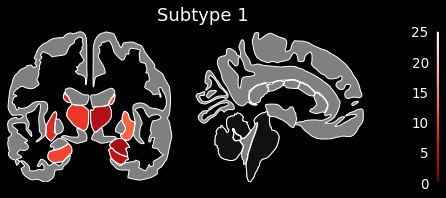

In [15]:
plot_aseg_atlas(T = T, S = S, subtype = 'Subtype 1', slider = 13)  

In [16]:
# {k: v for k, v in aseg_0.items() if v <= 5}